<a href="https://colab.research.google.com/github/NIrmal1321/DeepLearning-Projcts/blob/main/Deeplearning_Project_01_Fashion_Mist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deeplearning Project - 1
#   Project Name - Fashion Mnist (Using CNN)

*Description: This code uses a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset into 10 categories. The model is trained, evaluated with classification metrics, and visualized using a confusion matrix.*

# 🧠 What is a Convolutional Neural Network (CNN)?
*A Convolutional Neural Network (CNN) is a specialized kind of neural network designed to process and recognize patterns in images. It’s a key technique in deep learning, especially useful for tasks :*

dl im.avif

# ***1. import Necessery Librarise***

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

# ***2. Split And Load Keras Dataset***

In [ ]:
(x_train,y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# ***3. Check Traning & Testing Datasets***

In [ ]:
print("Traning Dataset:", x_train.shape, y_train.shape)
print("Testing Dataset:", x_test.shape, y_test.shape)

Traning Dataset: (60000, 28, 28) (60000,)
Testing Dataset: (10000, 28, 28) (10000,)


# ***4. Image Data in 2d numpy array shape 28 x 28 pixel***

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
y_train[0] # here in y_train result of 0 index Only for checking process

np.uint8(9)

# ***5. Create Class labels list for indexing easy for use***

In [ ]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#***6. Show all image using through loop or plot***

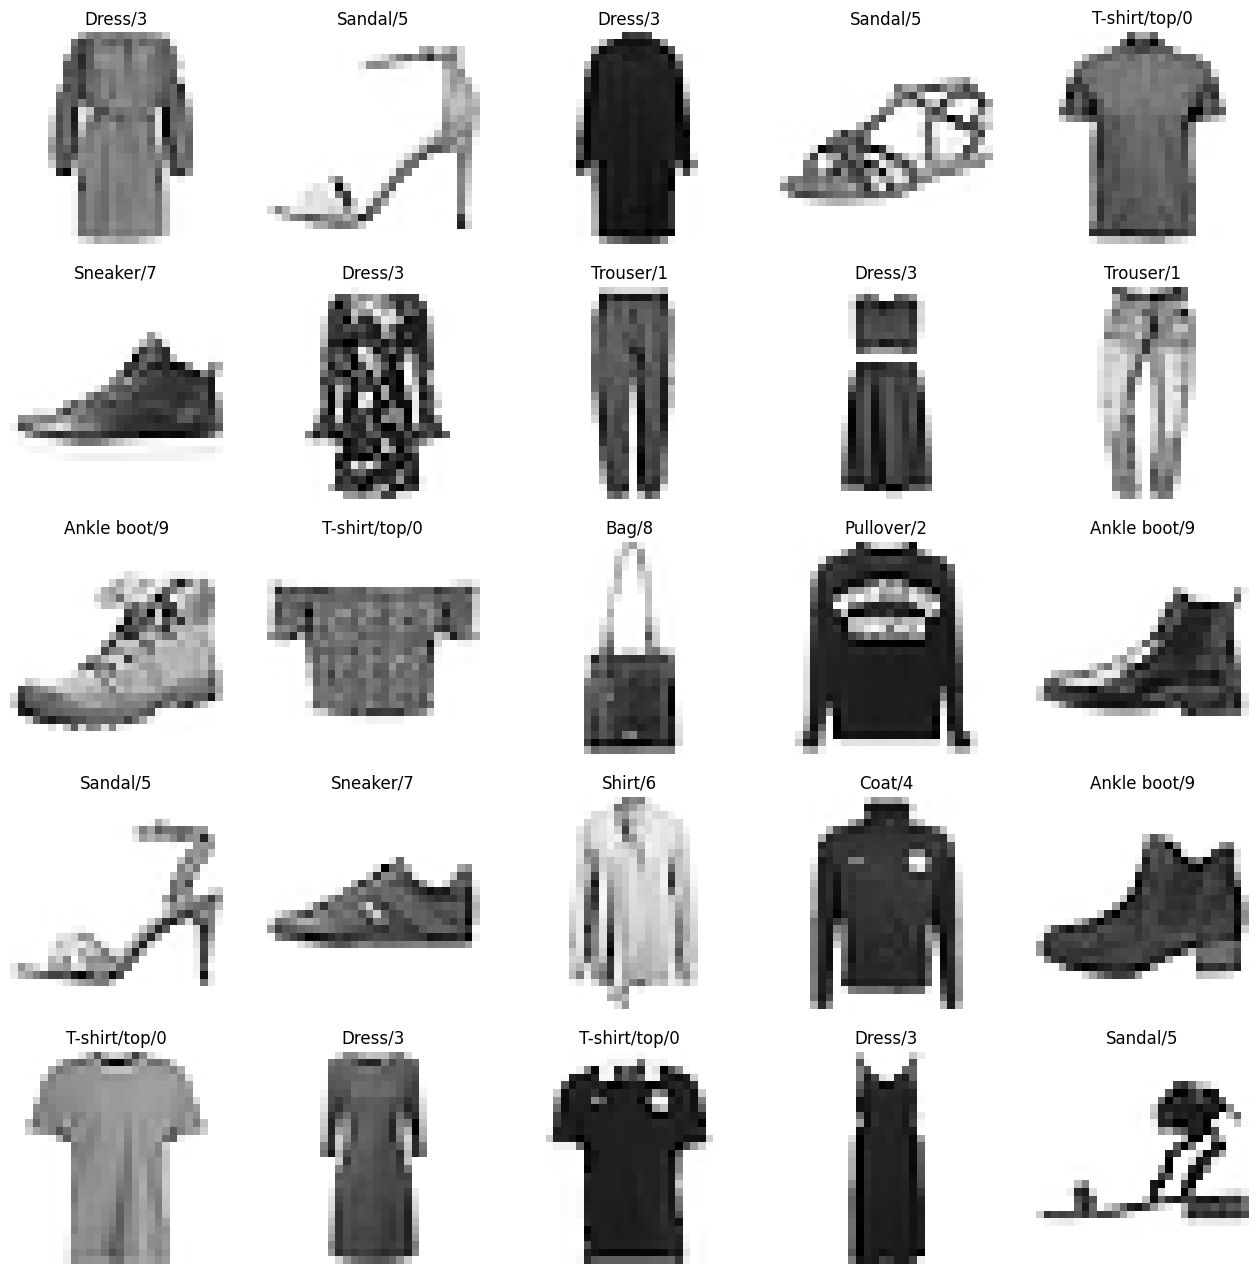

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i], cmap='Greys')
  plt.axis('off') # for of axis
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i])) # here curly bracket use for cloth name or place of number

# ***7. Change dimension 2d to 4d***

In [ ]:
x_train.shape # expected conv2d_input to 4 dimensions ,but got array with shape (28,28,1)

(60000, 28, 28)

In [ ]:
# so we have to increase the dimension 3 to 4
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
x_train.ndim

4

# ***8. Feature Scaling ***

In [ ]:
x_train = x_train/255 # after devid store in same variable
y_train = y_train/255 # 255 is the highest color num. so that why divide with this

# ***check Scaling***

In [ ]:
print(x_train[0]) # this is also called color scaling / color model

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

# ***9. Split Data and Validate***

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42) # random_state=42 for using for lock the data or do not flactuate the data

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# ***10. Build Neural Network***
*🧠 keras.models.Sequential([...])
- This creates a Sequential model, where layers are stacked one after another, like building blocks.
- Great for feedforward neural networks where data flows in one direction
*
*1️⃣ keras.layers.Flatten(input_shape=[28,28])
- Purpose: Converts a 2D image (28x28 pixels) into a 1D array (784 values).
- Why? Neural networks work with 1D input, not 2D image grids.
- Input shape is required only in the first layer to tell the model what to expect
*
*2️⃣ keras.layers.Dense(units=32, activation='relu')
- Adds a fully connected hidden layer with:
- 32 neurons (you can tune this number)
- ReLU activation (introduces non-linearity, helps model learn complex patterns)
- Each neuron gets all 784 inputs and learns weights to extract features.
*
*3️⃣ keras.layers.Dense(units=10, activation='softmax')
- This is the output layer:
- 10 neurons for 10 digit classes (0–9).
- softmax converts outputs into probabilities that sum to 1, so you can pick the most likely digit.
*
*📋 model.summary()
- Prints a neatly formatted table of:
- Layer types
- Output shapes
- Number of parameters to learn
- It’s your go-to tool to verify the architecture is exactly what you intend before training.
*


In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),  #Neural networks work with 1D input, not 2D image grids
                         keras.layers.Dense(units=32, activation = 'relu'),
                         keras.layers.Dense(units=10, activation = 'softmax')])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

# ***11. Build Neural Network Loss function / Create Loss Function***

*🔹 loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
This line sets the loss function your model will use to evaluate how far off its predictions are from the true values during training.
- SparseCategoricalCrossentropy is used when:
- You have multi-class classification.
- Your labels are integers (e.g., [0, 1, 2]) not one-hot encoded (like [0, 0, 1]).
- from_logits=True means:
- The output of your final layer (before softmax) is raw scores or logits, not probabilities.
- Keras will apply softmax automatically inside the loss function for proper probability comparison.
*

*🔹 model.compile(loss=loss_function, optimizer='adam')
This line compiles your model, essentially telling Keras:
- Which loss function to use for training (loss_function, set above).
- Which optimizer to use: 'adam' is an adaptive optimizer known for being efficient and commonly used in deep learning.
*

In [ ]:
loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_function, optimizer='adam')

# ***12. fit model with 10 imagess or Run 10 Epoches for loss decreases***

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0343
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.3464e-05
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.5592e-05
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.6169e-06
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3576e-06
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.6993e-07
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4027e-07
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.6733e-07
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.9262e-08
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.3319e-08


# ***13. Test and Evaluate Neural Network Model***